In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import json
import ipympl
from scipy.constants import c, elementary_charge
import time
import os

dict_keys(['epsx', 'epsy', 'meanx', 'meany', 'meanz', 'meane', 'sigmax', 'sigmay', 'sigmaz', 'sigmae', 'inputs', 'parameters'])
<class 'list'>


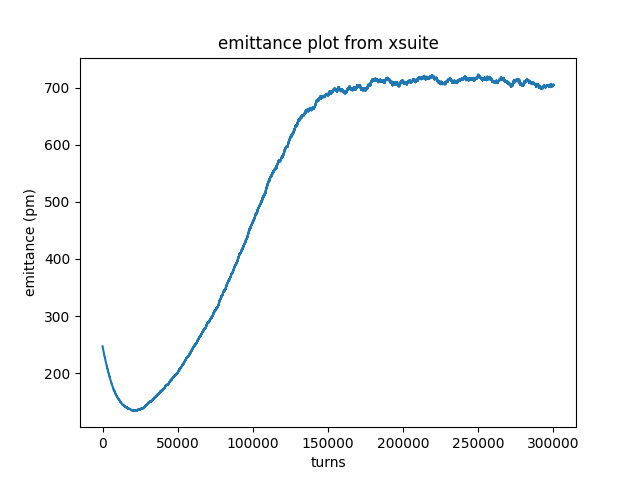

In [22]:
%matplotlib ipympl
#############################################json cell###################################
file_name = "output_250411_091713.json"
with open("Xsuite_data/output_xsuite_250418_053101_job_56411624.json") as f:
    outputs = json.load(f)

print(outputs.keys())
emitx = outputs["epsx"]
print(type(emitx["value"]))
emit_x = np.array(emitx['value'])



plt.cla()
plt.plot(emit_x*1e12)
plt.ylabel("emittance (pm)")
plt.xlabel("turns")
plt.title("emittance plot from xsuite" )
plt.show()

In [8]:
inputs = outputs["inputs"]
parameters = outputs["parameters"]

print(inputs)
print(50*"-")
for el, val in parameters.items():
    print(el, ":", val)

print(50*"-")

print("Population x 1e10:", parameters["Np"]*1e-10)
D_t = parameters["C"] /c
D_Q = elementary_charge * parameters["Np"]
print("bunch current: ",D_Q/D_t * 1e3, "mA")
print("bunch charge : ", D_Q*1e9, "nC")

{'mode': 'z', 'n_macroparticles': 10000, 'n_turns': 300000, 'ibs': True, 'wake': True, 'detuning': True, 'dispersion': True, 'gaussian_noise': True, 'origin': 'map', 'kernel': 'cpu', 'comp': 'bench', 'dir_name': 'delete_me', 'comment': 'testing the classes', 'bunch': 'matched'}
--------------------------------------------------
filename : _inputs/Booster_parameter_table.json
C : 90658.74531999999
Np : 25000000000.0
Nb : 1120
Etot : 20000000000.0
epsnx : 9.999999999999999e-06
epsny : 9.999999999999999e-06
sigmaz : 0.004
sigmae : 0.001
Qx : 414.225
Qy : 410.29
chix : 2.057246532
chiy : 1.778971585
alpha : 7.120435962e-06
I2 : 0.0005936549319
I3 : 5.681453654e-08
I5 : 1.698280783e-11
I6 : 0
dpt : 0.03
damp_xy : 9.045401802006868
damp_s : 4.522700901003434
coupling : 0.002
Cq : 3.8319e-13
Cgamma : 8.846e-05
Erest : 510998.9499961642
Egain : 0
freq : 800000000.0
Vtot : 50084569.672473334
Qs : 0.026196452787125228
phi_s : 178.47
lambdaRF : 0.3747405725
frev : 3306.823373098939
h : 241924.018

Keys: <KeysViewHDF5 ['BunchData_1']>
<HDF5 group "/BunchData_1" (6 members)>


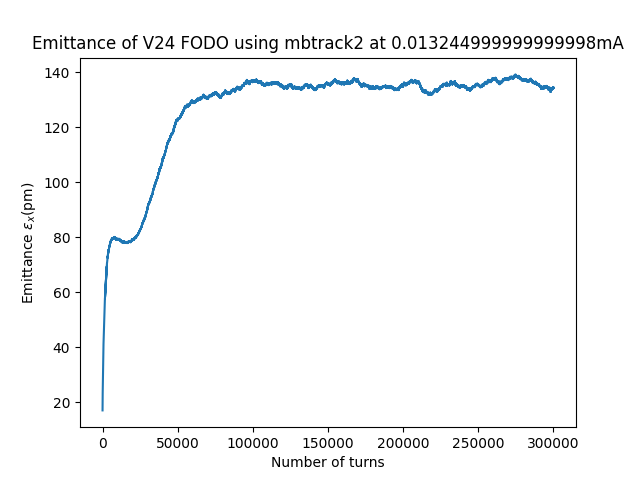

In [12]:
#############################################   hdf5 cell  ###################################


# temps = time.strftime("%y%m%d_%H%M%S", time.localtime())
with h5py.File("mbtrack_data/CIMP_250417_130401_56500125.hdf5", 'r') as f:
    print("Keys: %s" % f.keys())
    # print(f.keys())
    group = f["BunchData_1"]
    print(group)
    emit = group["emit"][:]
    current = f["BunchData_1"]["current"][0]
    emit = np.array(emit)

# print(emit[0,:])


plt.cla()
plt.plot(emit[0,:]*1e12)
plt.ylabel(r"Emittance $\epsilon_{x}$(pm)")
plt.title(f"Emittance of V24 FODO using mbtrack2 at {current*1e3}mA")
plt.xlabel("Number of turns")
# plt.figure(figsize=(8,6))
# plt.savefig(f"figures/fig_{temps}_cpl.png")
plt.show()

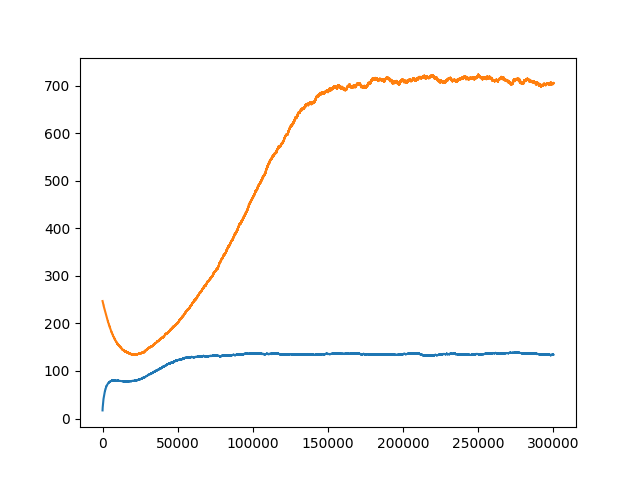

In [13]:
plt.cla()
plt.plot(emit[0,:]*1e12)
plt.plot(emit_x*1e12)
plt.show()